In [534]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [535]:
anime_with_synopsis = pd.read_csv("anime_with_synopsis.csv")
df = anime_with_synopsis.copy()
df=df.rename(columns={'MAL_ID':'anime_id'})

In [536]:
df.shape

(16214, 5)

In [537]:
df.head()

,anime_id,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [538]:
df.tail()

,anime_id,Name,Score,Genres,sypnopsis
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.
16213,48492,Scarlet Nexus,Unknown,"Action, Fantasy",Solar calendar year 2020: grotesque organisms ...


In [539]:
df.isnull().sum()

anime_id     0
Name         0
Score        0
Genres       0
sypnopsis    8
dtype: int64

In [540]:
df.dropna(inplace = True)
df.drop("Score", axis = 1, inplace = True)

In [541]:
df.isnull().sum()

anime_id     0
Name         0
Genres       0
sypnopsis    0
dtype: int64

In [542]:
df.shape

(16206, 4)

In [543]:
df.head()

,anime_id,Name,Genres,sypnopsis
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [544]:
vectorizer = TfidfVectorizer(stop_words = "english", analyzer = "word")
Gen_TF_IDF_matrix = vectorizer.fit_transform(df["Genres"])
Gen_TF_IDF_matrix.shape

(16206, 45)

In [545]:
Gen_cos_sim = cosine_similarity(Gen_TF_IDF_matrix)
Gen_cos_sim.shape

(16206, 16206)

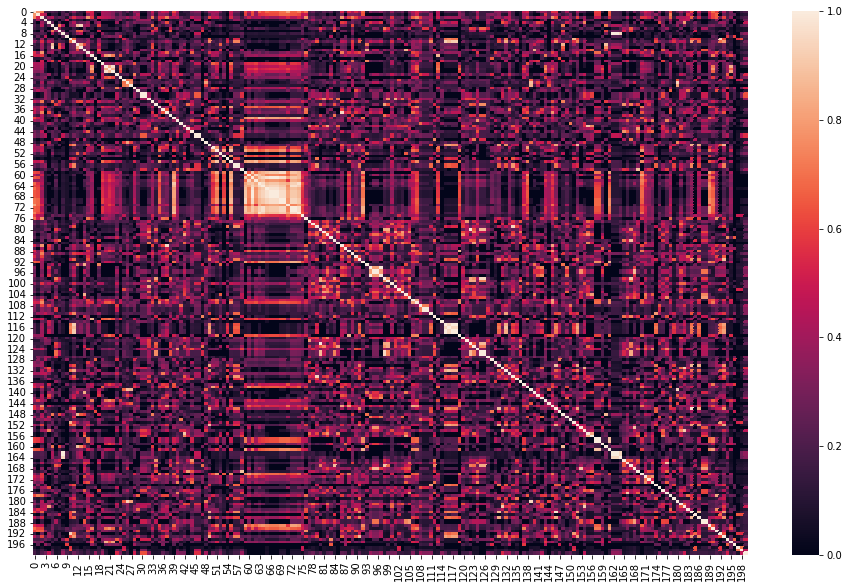

In [546]:
corr1 = Gen_cos_sim[:200, :200]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(corr1)

In [547]:
vectorizer = TfidfVectorizer(stop_words = "english", analyzer = "word")
Syp_TF_IDF_matrix = vectorizer.fit_transform(df["sypnopsis"])
Syp_TF_IDF_matrix.shape

(16206, 45064)

In [548]:
Syp_cos_sim = cosine_similarity(Syp_TF_IDF_matrix)
Syp_cos_sim.shape

(16206, 16206)

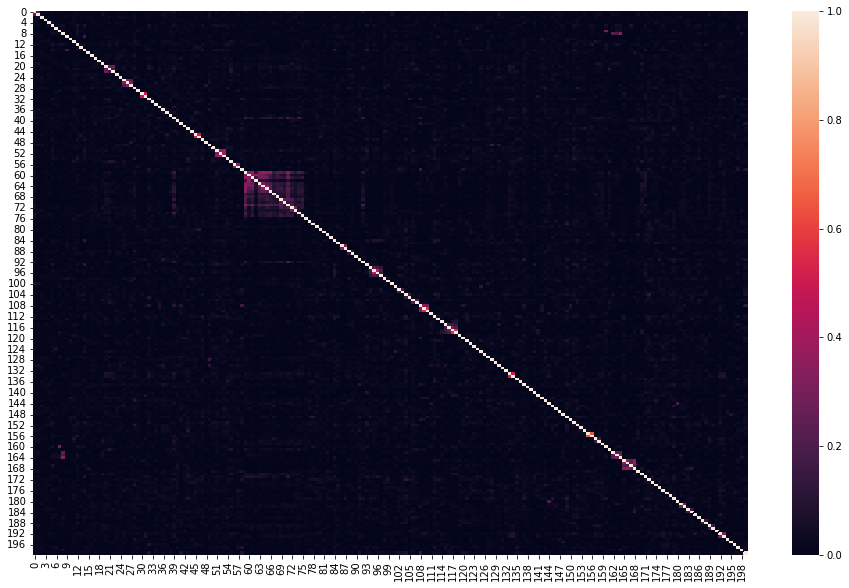

In [549]:
corr2 = Syp_cos_sim[:200, :200]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(corr2)

In [550]:
Fin_cos_sim = 0.5*Gen_cos_sim+0.5*Syp_cos_sim
Fin_cos_sim.shape

(16206, 16206)

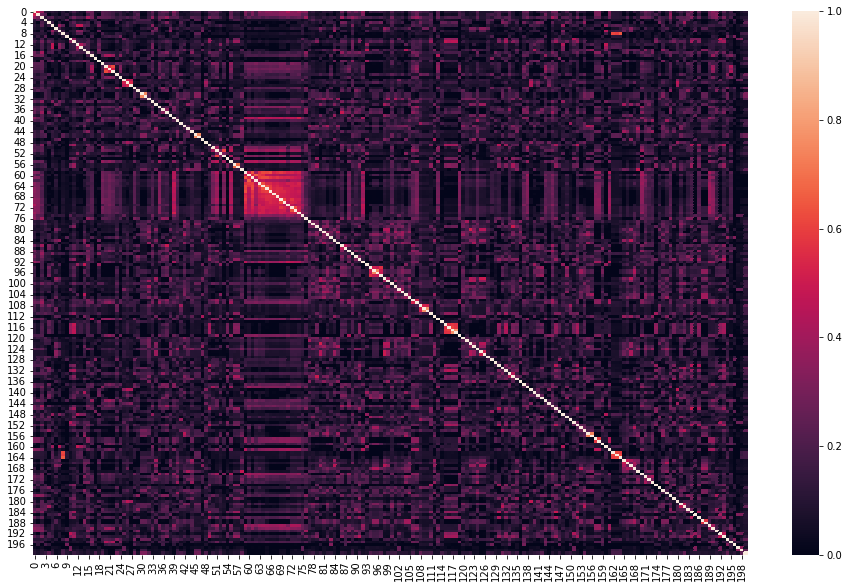

In [551]:
corr = Fin_cos_sim[:200, :200]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(corr)

In [552]:
def anime_searcher(df, name_words_contain):
    print(df.loc[df["Name"].str.contains(name_words_contain, na = False), "Name"])

def content_based_recommender(df, anime_name = "Cowboy Bebop" , rec_count = 5):
    indices = pd.Series(df.index, index = df["Name"])
    indices = indices[~indices.index.duplicated(keep = "last")]
    anime_index = indices[anime_name]
    similarity_score = pd.DataFrame(Fin_cos_sim[anime_index], columns = ["score"])
    similar_animes = similarity_score.sort_values(by = "score", ascending = False).iloc[0:rec_count].index

    df['similarity_score']=similarity_score 
    return df.iloc[similar_animes].sort_values(by = "similarity_score", ascending = False).iloc[0:rec_count]
    #return similarity_score



In [553]:
anime_searcher(df, name_words_contain = "Trig")

2                                                   Trigun
3090                               Trigun: Badlands Rumble
8134                                         World Trigger
11042                                         Trigger-chan
12123               Grisaia: Phantom Trigger The Animation
15132                             World Trigger 2nd Season
15637    Grisaia: Phantom Trigger The Animation - Starg...
16059                             World Trigger 3rd Season
Name: Name, dtype: object


In [554]:
content_based_recommender(df, anime_name = "Trigun", rec_count = 10)

,anime_id,Name,Genres,sypnopsis,similarity_score
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",1.000000
3090,4106,Trigun: Badlands Rumble,"Action, Adventure, Comedy, Drama, Sci-Fi, Shounen",Vash the Stampede is a contradiction. He has a...,0.705407
2057,2408,Keroro Gunsou Movie 2: Shinkai no Princess de ...,"Action, Adventure, Comedy, Drama, Sci-Fi, Shounen",During a vacation Natsumi is visited by a fema...,0.509458
903,1022,Generator Gawl,"Action, Adventure, Comedy, Drama, Sci-Fi, Shounen","o, Gawl and Koji are 3 young boys who travel b...",0.502931
4128,6872,Cyborg 009,"Action, Adventure, Drama, Sci-Fi, Shounen",Original Cyborg 009 1966 movie based on the ma...,0.479935
2067,2422,Kenritsu Chikyuu Boueigun,"Action, Sci-Fi, Adventure, Comedy, Shounen","Telegraph Pole Society, a mysterious group, is...",0.466029
2612,3193,Asobot Senki Gokuu,"Action, Sci-Fi, Adventure, Comedy, Shounen","Four years into the future, the world has lost...",0.463049
3919,6375,Kagaku Ninja-tai Gatchaman F,"Action, Adventure, Sci-Fi, Shounen",fter Leader X is seemingly destroyed for good ...,0.453364
2602,3175,Kaitei Choutokkyuu: Marine Express,"Action, Adventure, Comedy, Sci-Fi, Drama","The year is 2002, and the Marine Express, the ...",0.452161
794,901,"Dragon Ball Z Movie 08: Moetsukiro!! Nessen, R...","Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh...",s Goku investigates the destruction of the Sou...,0.449413


In [555]:
anime_searcher(df, name_words_contain = "Cowboy")

0                            Cowboy Bebop
1         Cowboy Bebop: Tengoku no Tobira
3044      Cowboy Bebop: Yose Atsume Blues
6703     Cowboy Bebop: Ein no Natsuyasumi
12387                     Chibikko Cowboy
12416                   Waga Na wa Cowboy
Name: Name, dtype: object


In [556]:
content_based_recommender(df, anime_name = "Cowboy Bebop", rec_count = 10)

,anime_id,Name,Genres,sypnopsis,similarity_score
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",1.000000
3044,4037,Cowboy Bebop: Yose Atsume Blues,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Due to the violence portrayed in the Cowboy Be...,0.556755
1145,1287,Odin: Koushi Hansen Starlight,"Action, Sci-Fi, Adventure, Space, Drama","In the year 2099, mankind has colonized parts ...",0.527387
365,400,Seihou Bukyou Outlaw Star,"Action, Sci-Fi, Adventure, Space, Comedy",Gene Starwind has always dreamed of piloting h...,0.523533
1914,2203,Waga Seishun no Arcadia: Mugen Kidou SSX,"Action, Adventure, Drama, Sci-Fi, Space",he end of Arcadia of My Youth Capitain Harlock...,0.509253
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ...",0.506725
1300,1490,Ginga Tetsudou Monogatari,"Action, Adventure, Drama, Sci-Fi, Space","In the distant future, trains are no longer bo...",0.505654
1913,2202,Waga Seishun no Arcadia,"Action, Adventure, Drama, Sci-Fi, Space",Earth has been conquered by the evil Illumidus...,0.496075
1092,1226,Seihou Tenshi Angel Links,"Action, Adventure, Space, Comedy, Romance, Dra...","fon is the head of a free, no expenses paid pr...",0.492373
1301,1491,Ginga Tetsudou 999,"Sci-Fi, Adventure, Space, Drama","In the distant future, humanity has found a wa...",0.488474


In [557]:
df[df['Name'] == 'Cowboy Bebop']

,anime_id,Name,Genres,sypnopsis,similarity_score
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",1.0


In [558]:
df[df['Name'] == 'Seihou Bukyou Outlaw Star']

,anime_id,Name,Genres,sypnopsis,similarity_score
365,400,Seihou Bukyou Outlaw Star,"Action, Sci-Fi, Adventure, Space, Comedy",Gene Starwind has always dreamed of piloting h...,0.523533


In [559]:
content_based_recommender(df, anime_name = "Naruto", rec_count = 10)

,anime_id,Name,Genres,sypnopsis,similarity_score
10,20,Naruto,"Action, Adventure, Comedy, Super Power, Martia...","oments prior to Naruto Uzumaki's birth, a huge...",1.000000
1508,1735,Naruto: Shippuuden,"Action, Adventure, Comedy, Super Power, Martia...",It has been two and a half years since Naruto ...,0.681510
11346,34566,Boruto: Naruto Next Generations,"Action, Adventure, Super Power, Martial Arts, ...",Following the successful end of the Fourth Shi...,0.670497
6158,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Super Power, Martial Arts, ...","urning home to Konohagakure, the young ninja c...",0.662017
8831,28755,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P...","The spirited Boruto Uzumaki, son of Seventh Ho...",0.622506
4598,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...","ssigned on a mission to capture Mukade, a miss...",0.600234
10244,32365,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Super Power, Martial Arts, Sho...",Bundled with the limited edition of Blu-ray/DV...,0.571283
5518,10686,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,"Action, Adventure, Martial Arts, Shounen, Supe...",Naruto faces off against his old pupil Konoham...,0.559748
5487,10589,Naruto: Shippuuden Movie 5 - Blood Prison,"Action, Adventure, Martial Arts, Super Power, ...",fter being captured for attempting to assassin...,0.558142
6647,16870,The Last: Naruto the Movie,"Action, Super Power, Romance, Martial Arts, Sh...",Two years have passed since the end of the Fou...,0.551634


In [560]:
anime_searcher(df, name_words_contain = "Naruto")

10                                                  Naruto
403      Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...
546      Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...
678              Naruto: Akaki Yotsuba no Clover wo Sagase
826      Naruto Movie 2: Dai Gekitotsu! Maboroshi no Ch...
950      Naruto Narutimate Hero 3: Tsuini Gekitotsu! Jo...
1508                                    Naruto: Shippuuden
1871     Naruto Movie 3: Dai Koufun! Mikazuki Jima no A...
1952     Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...
2096                            Naruto: Shippuuden Movie 1
3103     Naruto: Shippuuden - Shippuu! "Konoha Gakuen" Den
3202                   Naruto: Shippuuden Movie 2 - Kizuna
3904     Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
4300                               Naruto: The Cross Roads
4598           Naruto: Shippuuden Movie 4 - The Lost Tower
5281                                           Naruto x UT
5487             Naruto: Shippuuden Movie 5 - Blood Pris

In [561]:
anime_user_rating = pd.read_csv("df2(10000).csv")
df2 = anime_user_rating.copy()
df2_= anime_user_rating.copy()

df2.drop(['index_'], axis=1, inplace=True)
df2_.drop(['index_'], axis=1, inplace=True)

In [562]:
df2.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [563]:
df2.tail()

,user_id,anime_id,rating
1048570,6745,36286,9
1048571,6745,32094,6
1048572,6745,30015,10
1048573,6745,35466,10
1048574,6745,32262,9


In [564]:
len(df2)

1048575

In [565]:
df2.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [566]:
df2.dropna(inplace = True)

In [567]:
df2.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [568]:
len(df2)

1048575

In [569]:
len(df2[df2['user_id']==0])

35

In [570]:
df2.sort_values(by = "anime_id", ascending = False)

,user_id,anime_id,rating
767242,5045,48456,5
1018724,6548,48456,4
380378,2389,48456,6
44140,322,48456,6
292929,1817,48456,5
...,...,...,...
617009,4011,1,10
328596,2055,1,9
986527,6343,1,10
837960,5466,1,7


In [571]:
df2.drop(df2[df2['user_id']>10000].index, axis=0, inplace=True)

In [572]:
df2.sort_values(by = "anime_id", ascending = True)

,user_id,anime_id,rating
92401,616,1,8
20408,156,1,9
893021,5746,1,8
727640,4798,1,10
263169,1619,1,8
...,...,...,...
1018724,6548,48456,4
767242,5045,48456,5
44140,322,48456,6
380378,2389,48456,6


In [573]:
df2.sort_values(by = "user_id", ascending = True)

,user_id,anime_id,rating
0,0,430,9
20,0,415,10
21,0,2236,10
22,0,448,5
23,0,2034,8
...,...,...,...
1048545,6745,19021,10
1048546,6745,32093,9
1048547,6745,24475,9
1048537,6745,30187,9


In [574]:
#from google.colab import files

#df2.to_csv('df2(10000).csv')
#files.download('df2(10000).csv')

In [575]:
df2.drop(df2[df2['rating']<10].index, axis=0, inplace=True)

In [576]:
df2.sort_values(by = "user_id", ascending = True)

,user_id,anime_id,rating
6,0,578,10
8,0,1571,10
20,0,415,10
21,0,2236,10
136,1,11577,10
...,...,...,...
1048531,6745,33255,10
1048529,6745,30727,10
1048526,6745,28621,10
1048550,6745,32951,10


In [577]:
len(df2[df2['user_id']==0])

4

In [588]:
def user_recommender_top_n(df2, user_id=0, top_n=10):
    
    list1 = list(df2[df2['user_id'] == user_id]['anime_id'])
    df0 = pd.DataFrame(index=range(0,0), columns=['anime_id', 'Name', 'Genres', 'sypnopsis', 'similarity_score'])
    for i in range(len(list1)):
        value1 = list(df[df['anime_id'] == list1[i]]['Name'])[0]
        df3 = content_based_recommender(df, anime_name = value1, rec_count = 10)
        df0 = pd.concat([df0,df3])

    df0=df0.rename(columns={'similarity_score':'recommendation_score'})
    df0_groupby = df0.groupby('anime_id').sum()

    unseen_anime_id_list=list(set(list(df0['anime_id']))-set(list(df2_[df2_['user_id']==user_id]['anime_id'])))
    seen_anime_id_list = list(set(list(df0['anime_id'])) - set(unseen_anime_id_list))

    for i in range(len(seen_anime_id_list)):
        df0.drop(df0[df0['anime_id'] == seen_anime_id_list[i]].index, axis=0, inplace=True)

    print('** Here is user%d information **' %user_id)
    print('number of animations that user have seen:', len(df2_[df2_['user_id']==user_id]))
    print('number of animations that the user gave 10 points:',len(df2[df2['user_id']==user_id]))
    print('number of whole recommendation for user:', len(df0_groupby))
    print('number of animations in a recommendation that user have seen:', len(seen_anime_id_list))
    print('number of animations in a recommendation that user have not seen:', len(unseen_anime_id_list))
    print('')
    print('** Here is top',top_n,'recomendation **\n')

    return df0.groupby('anime_id').sum().sort_values(by = "recommendation_score", ascending = False).iloc[0:top_n]
    


In [586]:
len(df2_[df2_['user_id']==1])

103

In [589]:
df2[df2.sort_values(by = "user_id", ascending = True)['user_id']==1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,anime_id,rating
36,1,32281,10
52,1,20,10
67,1,1735,10
70,1,1575,10
79,1,5114,10
105,1,9253,10
108,1,32188,10
126,1,199,10
130,1,16498,10
131,1,25777,10


In [590]:
user_recommender_top_n(df2, user_id=1020, top_n=10)

** Here is user1020 information **
number of animations that user have seen: 100
number of animations that the user gave 10 points: 19
number of whole recommendation for user: 152
number of animations in a recommendation that user have seen: 31
number of animations in a recommendation that user have not seen: 121

** Here is top 10 recomendation **



,recommendation_score
anime_id,
34438,1.254678
34440,1.193596
34439,1.187748
6773,1.103869
6572,1.101783
17187,1.082251
34437,1.057763
19191,1.056438
19193,1.049814


In [582]:
content_based_recommender(df, anime_name = "Ghost Hunt", rec_count = 10)

,anime_id,Name,Genres,sypnopsis,similarity_score
1369,1571,Ghost Hunt,"Mystery, Comedy, Horror, Supernatural, Shoujo","hile at school, Taniyama Mai and her friends l...",1.000000
1140,1281,Gakkou no Kaidan,"Mystery, Horror, Supernatural","Years ago, all of the ghosts in a haunted scho...",0.454211
6325,15037,Corpse Party: Tortured Souls - Bougyakusareta ...,"Mystery, Horror, Supernatural",Nine students gather in their high school at n...,0.442842
7618,22053,Gakkou no Kaidan (OVA),"Comedy, Horror, Mystery, Supernatural",OVAs included in the August and September issu...,0.437825
4412,7662,Shinrei Tantei Yakumo,"Mystery, Horror, Supernatural",Haruka Ozawa's sophomore year is getting serio...,0.431927
1808,2073,Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...,"Horror, Shoujo",Shoko and Maiko Ougi are apparently two ordina...,0.430173
10933,33761,Qui Shui Yi Yun,"Horror, Mystery, Supernatural","villa, involved in strange circumstances in th...",0.427555
7619,22055,Gakkou no Kaidan Recaps,"Horror, Mystery, Supernatural",ar special where Momoko stars to remember some...,0.426343
9606,30825,Gakkou no Kaidan: Kubinashi Rider!! Shi no Noroi,"Horror, Mystery, Supernatural",TV special of Gakkou no Kaidan that aired almo...,0.423804
10602,33103,Zekkyou Gakkyuu: Tensei,"Horror, Shoujo, Supernatural",girl's classmate disappears during a game of h...,0.419563
